In [4]:
# bitcon 데이터 분석
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'total_day_candle_BTC_2017-09-25_2023-03-30.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the DataFrame to get an overview of the data
df.head()
 

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate
0,KRW-BTC,2017-09-25T00:00:00,2017-09-25T09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,1506383997779,5.602146e+08,132.484755,4201000.0,121000.0,0.028803
1,KRW-BTC,2017-09-26T00:00:00,2017-09-26T09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,1506470368661,9.950724e+07,22.788340,4322000.0,-1000.0,-0.000231
2,KRW-BTC,2017-09-27T00:00:00,2017-09-27T09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,1506556751533,1.448276e+08,32.269662,4321000.0,336000.0,0.077760
3,KRW-BTC,2017-09-28T00:00:00,2017-09-28T09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,1506643183630,3.721860e+08,80.588243,4657000.0,-71000.0,-0.015246
4,KRW-BTC,2017-09-29T00:00:00,2017-09-29T09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,1506729571852,2.724558e+08,59.352373,4586000.0,71000.0,0.015482


#### 1. 시계열 분석: 비트코인 가격의 시간에 따른 변화를 시각화하고 분석
- 시계열 데이터를 시각화하여 비트코인 가격이 어떻게 변화했는지 살펴봄
- 그래프는 2017년 9월부터 2023년 3월까지의 비트코인 종가를 시간에 따라 나타낸 것
- 가격은 시간이 지남에 따라 전반적으로 상승하는 경향
- 가격에는 상당한 변동성이 있으며, 짧은 기간에 큰 가격 변화가 종종 발생

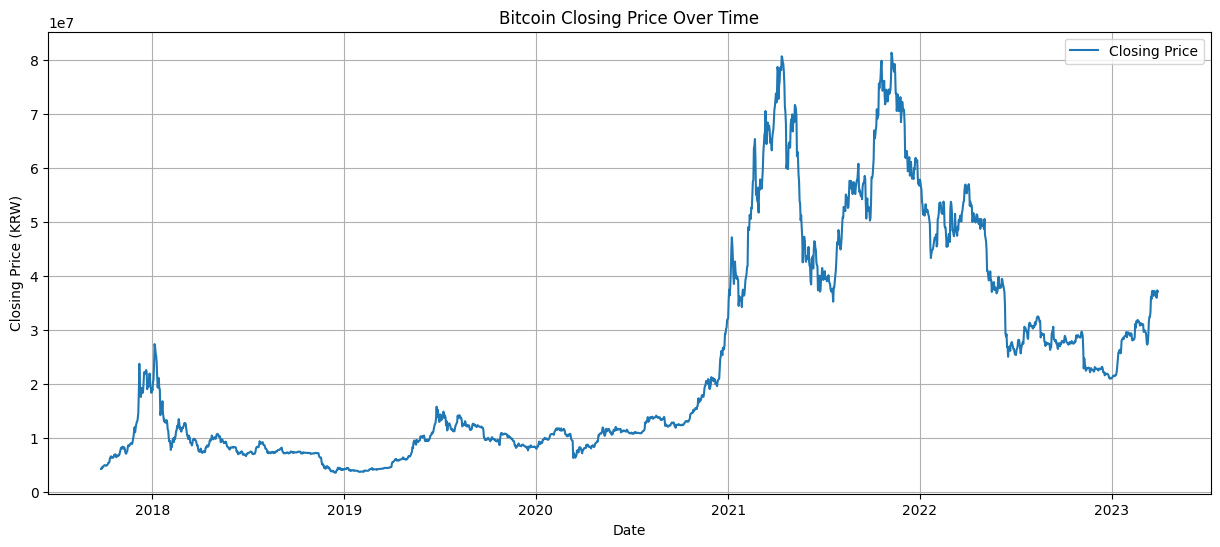

In [5]:
#  시계열 분석 : 시계열 데이터를 시각화하여 비트코인 가격이 어떻게 변화했는지 확인
import matplotlib.pyplot as plt

# Convert 'candle_date_time_utc' to datetime format
df['candle_date_time_utc'] = pd.to_datetime(df['candle_date_time_utc'])

# Plotting the time series data
plt.figure(figsize=(15, 6))
plt.plot(df['candle_date_time_utc'], df['trade_price'], label='Closing Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (KRW)')
plt.legend()
plt.grid(True)
plt.show()


### 2. 가격 변동에 대한 통계

In [8]:
# Calculate basic statistics for price columns
price_columns = ['opening_price', 'high_price', 'low_price', 'trade_price', 'change_price', 'change_rate']
price_stats = df[price_columns].describe()

price_stats


,opening_price,high_price,low_price,trade_price,change_price,change_rate
count,2.023000e+03,2.023000e+03,2.023000e+03,2.023000e+03,2.018000e+03,2023.000000
mean,2.418424e+07,2.476359e+07,2.354178e+07,2.420087e+07,1.621705e+04,0.001717
std,2.006667e+07,2.052682e+07,1.954818e+07,2.006445e+07,1.066250e+06,0.036789
min,3.620000e+06,3.685000e+06,3.562000e+06,3.619000e+06,-8.236000e+06,-0.330915
25%,8.705000e+06,8.898000e+06,8.468000e+06,8.711000e+06,-2.130000e+05,-0.012173
50%,1.316600e+07,1.357300e+07,1.285000e+07,1.317200e+07,8.500000e+03,0.000688
75%,3.739950e+07,3.827650e+07,3.650000e+07,3.738650e+07,2.475000e+05,0.015840
max,8.140200e+07,8.270000e+07,7.998700e+07,8.140300e+07,7.149000e+06,0.293692


### 3. 가격 예측
-  ARIMA(AutoRegressive Integrated Moving Average) 모델을 사용
- 이 예측이 투자 권유가 아니며, 실제 시장 상황은 매우 다를 수 있다는 것

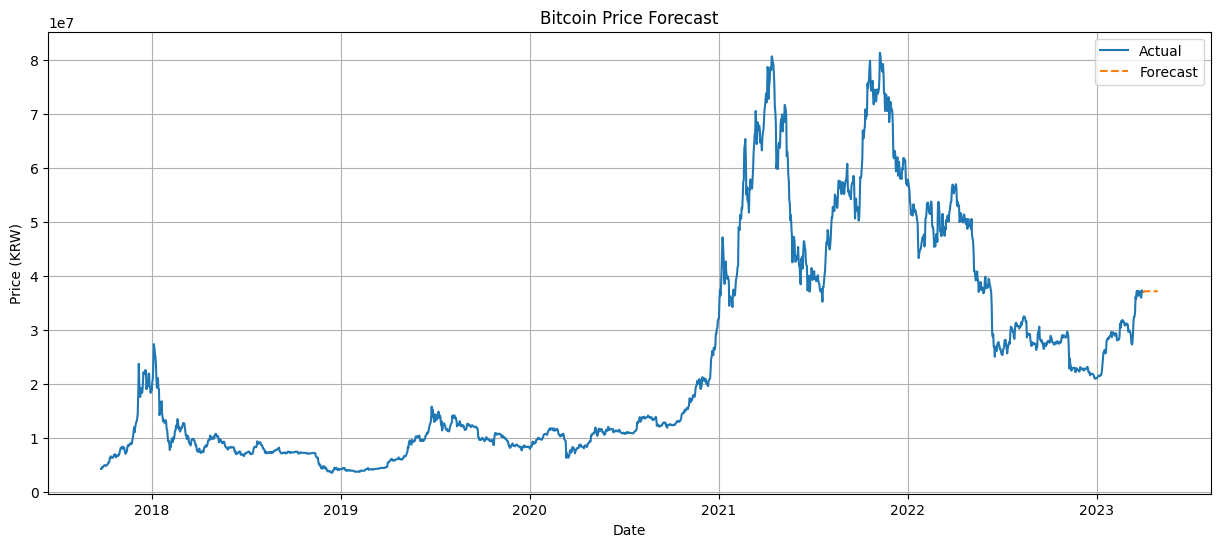

In [9]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Using only 'trade_price' for simplicity
price_series = df['trade_price'].astype(np.float64)

# Fit ARIMA model
# Parameters (p,d,q) are chosen for simplicity, and should be optimized for real-world application
model = ARIMA(price_series, order=(5,1,0))
model_fit = model.fit()

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Correct the issue with dimensions
forecast_dates = pd.date_range(df['candle_date_time_utc'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Plot the forecast results
plt.figure(figsize=(15, 6))
plt.plot(df['candle_date_time_utc'], df['trade_price'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast', linestyle='--')
plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)
plt.show()